# UDACITY PROJECT 5 - FINAL PROJECT
## Data Exploration - Ford GoBike System Data Analysis
### *Jhonatan Nagasako*
#### *28-FEB-2021*

<hr size="5"/>

<a id='contents'></a>
# Table of Contents (click link to section)

<a href="#intro">A. INTRODUCTION</a><br><br>
<a href="#gather">1. GATHERING DATA</a><br><br>
<a href="#assess">2. ASSESSING DATA</a><br><br>
<a href="#clean">3. CLEANING DATA</a><br><br>
<a href="#store">4. STORING DATA</a><br>

<a href="#explore">5. DATA EXPLORATION</a>    
* 5.1 <a href="#preliminary1">[Exporation - Preliminary Review]</a><br>
* 5.2 <a href="#univariate1">[Exporation - Univariate Exploration]</a><br>
* 5.3 <a href="#bivariate1">[Exporation - Bivariate Exploration]</a><br>
* 5.4 <a href="#multivariate1">[Exporation - Multivariate Exploration]</a><br>

<a href="#discussion">6. DISCUSSION</a><br> 
* 6.1 <a href="#preliminary2">[Discussion - Preliminary Review]</a><br>
* 6.2 <a href="#univariate2">[Discussion - Univariate Exploration]</a><br>
* 6.3 <a href="#bivariate2">[Discussion - Bivariate Exploration]</a><br>
* 6.4 <a href="#multivariate2">[Discussion - Multivariate Exploration]</a><br>  

<a href="#conclusion">7. CONCLUSION</a>



<hr size="5"/>

<a id='intro'></a>
# A. INTRODUCTION

This notebook will focus on the **data EXPLORATION** of Ford GoBike System. Data source can be found via [Udacity provided link to Google Docs/Drive](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True). 

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
* Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.
* Depending on scope of questions explored, additional data sources from other cities may be explored. Data can be accessed via [this page](https://www.google.com/url?q=https://www.bikeshare.com/data/&sa=D&source=editors&ust=1614518054096000&usg=AOvVaw38y_cueV0lTerb59CY7YsD) or [this page](https://www.google.com/url?q=https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems&sa=D&source=editors&ust=1614518054097000&usg=AOvVaw2OskG9ApXPoPZlezrpwmXp).

<a href="#contents">[Table of Contents]</a>

<hr size="5"/>
<h5><center>📚 Gathering START -- Project START 📚</center></h5>        
<hr size="5"/>

<a id='gather'></a>
# 1. GATHERING DATA

<font color=blue>

<a href="#contents">[Table of Contents]</a>

In [1]:
# import statements for all of the packages used for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm;

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

In [2]:
# gather .csv file
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
# high-level overview of data shape and composition
print('\n----Shape of File (row, column)---\n')
print(df.shape)
print('\n----Data Types---\n')
print(df.dtypes)
print('\n----Unique Values---\n')
print(df.nunique())
print('\n----Number of missing values---\n')
print(df.isnull().sum())


----Shape of File (row, column)---

(183412, 16)

----Data Types---

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

----Unique Values---

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude       

<hr size="5"/>
<h5><center>🔎 Gathering END ➜ Assessing START 🔎</center></h5>        
<hr size="5"/>

<a id='assess'></a>
# 2. ASSESSING DATA

<font color=blue>

<a href="#contents">[Table of Contents]</a>

<font color='red'>

<a id='todo'></a>
## QUALITY (click hyperlink question to go to section in notebook!)

<a href="#quality-section">[Go to QUALITY section]</a>
    
✔️ 1. <a href="#Q1">[Remove rows with ```NULL``` in ```end_station_id``` column (197 items)]</a>
    
    
2. <a href="#Q2">[Item above may fix this, but remove rows with ```NULL``` in thee following columns (197 items each)]</a>

    * start_station_id
    * start_station_name
    * end_station_name
    
    
3. <a href="#Q3">[Remove rows in ```start_station_latitude``` in ```start_station_longitude``` columns]</a>
    
    * should change from 334-latitude and 335-longitude to 329 items
    
    
4. <a href="#Q4">[Review ```member_birth_year``` and determine good cut-off date--remove rows respectively]</a>
    
    * E.g., There is someone born in 1900 that rented a bike in 2019... that makes that person over 100 years old!
    * consider average age and oldest person... this could be errors that can be removed

    
5. <a href="#Q5">[Convert ```duration_sec``` to minutes, hours, or/and days]</a>
    
<br>
    
>**Tips for Common Data Quality Issues**
>1. Missing data
2. Invalide data (e.g., state a negative height, or other datatype validation errors--str vs int vs float, think there can only be 2 people in a room... not 2.54 people in a room... *unless there's ghosts lol*)
3. Inaccurate data (e.g., specifying a foot = 5 inches, which is WRONG. A foot = 12 inches)
4. Inconsistent data (e.g., mixing up units, some data captured as cm instead of inches)



## TIDINESS
    
<a href="#tidy-section">[Go to TIDY section]</a>
    
1. <a href="#T1">[Create columns to break apart ```start_time``` to ```date``` and ```time```]</a>

    
2. <a href="#T2">[Create columns to break apart ```end_time``` to ```date``` and ```time```]</a>

<br>
    
>**Tips for Tidying**
>1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table
*Reference for [tidy data here](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)*

<br>
    
## FEATURE ENGINEEERING
1. <a href="#F1">[Create column for ```day of week``` for the start/end days--to see what days bikes are rented the most]</a>
    
<a href="#assess">[Assessing Data Requirements]</a> <a href="#contents">[Table of Contents]</a>

<hr size="5"/>
<h5><center>🧹 Assessing END ➜ Cleaning START 🧹</center></h5>        
<hr size="5"/>

<a id='clean'></a>
# 3. CLEANING DATA

<font color=blue>
    
   
<a href="#todo">[Cleaning and Tidying To-do List]</a> 
<a href="#contents">[Table of Contents]</a>

<a id='quality-section'></a>

<font color='red'>
    
## QUALITY ISSUES ADDRESSED -- note that ```df``` will change to ```dfc``` to indicate cleaned data
    
<a href="#todo">[Cleaning and Tidying To-do List]</a>

<a id='Q1'></a>

<font color='red'>

### ✔️ 1. <a href="#Q1">[Remove rows with ```NULL``` in ```end_station_id``` column (197 items)]</a>

<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [4]:
# before cleaning 
print('\n----BEFORE CLEANING >> Number of missing values---\n')
print(df.isnull().sum())
print('\n----BEFORE CLEANING >> Shape of File (row, column)---\n')
print(df.shape)


----BEFORE CLEANING >> Number of missing values---

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

----BEFORE CLEANING >> Shape of File (row, column)---

(183412, 16)


In [5]:
# create test df for prototyping
test = df

# remove missing values
test.dropna(subset=['end_station_id'], inplace=True)
print('\n----AFTER CLEANING >> Number of missing values---\n')
print(df.isnull().sum())
print('\n----AFTER CLEANING >> Shape of File (row, column)---\n')
print(df.shape)


----AFTER CLEANING >> Number of missing values---

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

----AFTER CLEANING >> Shape of File (row, column)---

(183215, 16)


In [6]:
# reassign cleaned data to dfc
dfc = test
print(dfc.shape)
dfc.head(3)

(183215, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


*This process also removed the rows of missing information that was in the following columns:*

   * ```start_station_id```
   * ```start_station_name```
   * ```end_station_name```

<a id='Q2'></a>

<font color='red'>

### ✔️ 2. <a href="#Q2">[Item above may fix this, but remove rows with ```NULL``` in thee following columns (197 items each)]</a>

    * start_station_id
    * start_station_name
    * end_station_name

<a href="#todo">[Cleaning and Tidying To-do List]</a>

*See section <a href="#Q1">(Quality Question Task Q1)</a> for the removal of the missing values.*

<a id='Q3'></a>

<font color='red'>

### ✔️ 3. <a href="#Q3">[Remove rows in ```start_station_latitude``` in ```start_station_longitude``` columns]</a>
    
    * should change from 334-latitude and 335-longitude to 329 items

<a href="#todo">[Cleaning and Tidying To-do List]</a>

*See section <a href="#Q1">(Quality Question Task Q1)</a> for the removal of the missing values.*

<a id='Q4'></a>

<font color='red'>

### ✔️ 4. <a href="#Q4">[Review ```member_birth_year``` and determine good cut-off date--remove rows respectively]</a>

<a href="#todo">[Cleaning and Tidying To-do List]</a>

In [7]:
# high-level overview of data shape and composition
print('\n----INITIAL STATE > Shape of File (row, column)---\n')
print(dfc.shape)
print('\n----INITIAL STATE > Data Types---\n')
print(dfc.dtypes)
print('\n----INITIAL STATE > Unique Values---\n')
print(dfc.nunique())
print('\n----INITIAL STATE > Number of missing values---\n')
print(dfc.isnull().sum())


----INITIAL STATE > Shape of File (row, column)---

(183215, 16)

----INITIAL STATE > Data Types---

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

----INITIAL STATE > Unique Values---

duration_sec                 4749
start_time                 183204
end_time                   183200
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_n

<a id='zero'></a>

In [8]:
# create test df for prototyping
test = dfc

# need to fill blank locations in order to change the data type
test = test.fillna(0)

# change member_birth_year from FLOAT to INT
test['member_birth_year'] = test['member_birth_year'].astype(int) 

print('\n----CLEANED STATE > Shape of File (row, column)---\n')
print(test.shape)
print('\n----CLEANED STATE > Data Types---\n')
print(test.dtypes)
print('\n----CLEANED STATE > Unique Values---\n')
print(test.nunique())
print('\n----CLEANED STATE > Number of missing values---\n')
print(test.isnull().sum())


----CLEANED STATE > Shape of File (row, column)---

(183215, 16)

----CLEANED STATE > Data Types---

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
dtype: object

----CLEANED STATE > Unique Values---

duration_sec                 4749
start_time                 183204
end_time                   183200
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_n

*Removing the missing values in the ```member_birth_year``` also removed missing values in ```member_gender```*

Determine good cutoff range, note that the data set is from 02-FEB-2019.

* [Oldest person alive](https://www.google.com/search?q=oldest+person+alive&rlz=1C1GCEB_enUS893US893&oq=oldest+person&aqs=chrome.0.0i433j69i57j0l2j0i67j0l5.3255j0j7&sourceid=chrome&ie=UTF-8) is **118**

After the review of the [2010 U.S. Census Bureu](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf), lets make *age 100* the cut off point when considering age and gender.

In [9]:
# create column for age (based on 2019)
test['age'] = 2019 - test['member_birth_year']

# help: https://datascience.stackexchange.com/questions/38720/shifting-the-last-column-in-the-dataframe-to-the-first-place
# move last column to first temporarily
cols = list(test.columns)
cols = [cols[-1]] + cols[:-1]
test = test[cols]

#display data before filtering
test1 = test
print('BEFORE FILTER - Basic Stats on AGE\n', test.age.describe())
print('\nBEFORE FILTER, Zero Count = ',test1.age.isin([0]).sum())
test.head(2)

BEFORE FILTER - Basic Stats on AGE
 count    183215.000000
mean        123.711525
std         412.013105
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: age, dtype: float64

BEFORE FILTER, Zero Count =  0


,age,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,35,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,2019,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,No


In [10]:
# replace any values greater than 100 with zeros -- data set should remain the same
test['age'].values[test['age'].values > 100] = 0

# review age statitics distrubtion
print('AFTER FILTER - Basic Stats on AGE\n', test.age.describe())
print('\nAFTER FILTER, Zero Count in AGE column = ',test1.age.isin([0]).sum())
test.head(2)

AFTER FILTER - Basic Stats on AGE
 count    183215.000000
mean         32.607909
std          12.067822
min           0.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          99.000000
Name: age, dtype: float64

AFTER FILTER, Zero Count in AGE column =  8335


,age,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,35,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,0,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,No


Knowing the number of ZEROS in the ```AGE``` column may be important to consider when taking the mean or median (e.g., stats) of the dataframe. These ZEROS may need to be filtered/removed to ensure proper stats are completed with entries with acutal data.

Note we replaced all BLANKS with ZEROS <a href="#zero">earlier in the code.</a>

In [11]:
# help: https://cmdlinetips.com/2020/03/move-a-column-to-first-position-in-pandas-dataframe/
# moving age next to member_birth_year
col_name="age"
first_col = test.pop(col_name)
test.insert(14, col_name, first_col)
test.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


In [12]:
# make test df into dfc again
dfc = test
dfc.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


<a id='Q5'></a>

<font color='red'>

### ✔️ 5. <a href="#Q5">[Convert ```duration_sec``` to minutes, hours, or/and days]</a>

<a href="#todo">[Cleaning and Tidying To-do List]</a>

<a id='firstLast'></a>

In [13]:
# help: https://stackoverflow.com/questions/45579525/returning-a-dataframe-in-python-function/48368668
# preventing memory lost of df created in function

def firstLast(dataframe):
    cols = list(dataframe.columns)
    cols = [cols[-1]] + cols[:-1]
    dataframe = dataframe[cols]
    return dataframe

def timeConvertion(dataframe, seconds):
    dataframe['duration_min'] = dataframe[seconds] / 60
    dataframe = firstLast(dataframe) # save the dataframe within the function so it is not removed from memory
    dataframe['duration_hr'] = dataframe['duration_min'] / 60
    dataframe = firstLast(dataframe)
    return dataframe

test = dfc

test1 = timeConvertion(test, 'duration_sec')

test1.head(2)

<ipython-input-13-e9e6cb56d66f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['duration_hr'] = dataframe['duration_min'] / 60


,duration_hr,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,14.495833,869.750000,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,11.811389,708.683333,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


In [14]:
# assign prototype df to clean df
dfc = test1
dfc.head(2)

,duration_hr,duration_min,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,14.495833,869.750000,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,11.811389,708.683333,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


<a id='tidy-section'></a>

<font color='red'>

## TIDINESS ISSUES ADDRESSED -- note that ```df``` will change to ```dfc``` to indicate cleaned data

<a href="#clean">[Cleaning Data Requirements]</a> 
<a href="#todo">[Cleaning and Tidying To-do List]</a> 
<a href="#contents">[Table of Contents]</a>

<a id='T1'></a>

<font color='red'>

### ✔️ 1. <a href="#T1">[Create columns to break apart ```start_time``` to ```date``` and ```time```]</a>

<a href="#todo">[Cleaning and Tidying To-do List]</a>

The function ```firstLast``` can be found <a href="#firstLast">earlier in the code.</a>

In [15]:
def dateSeperator(dataframe, start, end):
    dataframe[end] = pd.to_datetime(dataframe[end])

    dataframe['end_hour'] = dataframe[end].dt.time
    dataframe = firstLast(dataframe)

    dataframe[start] = pd.to_datetime(dataframe[start])
    dataframe['start_hour'] = dataframe[start].dt.time
    dataframe = firstLast(dataframe)
    
    dataframe[end] = pd.to_datetime(dataframe[end])
    dataframe['end_day'] = dataframe[end].dt.date
    dataframe = firstLast(dataframe)
    
    dataframe[start] = pd.to_datetime(dataframe[start])
    dataframe['start_day'] = dataframe[start].dt.date
    dataframe = firstLast(dataframe)
    
    return dataframe

test = dfc

test1 = dateSeperator(test, 'start_time', 'end_time')

test1.head(2)

,start_day,end_day,start_hour,end_hour,duration_hr,duration_min,duration_sec,start_time,end_time,start_station_id,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,14.495833,869.750000,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,11.811389,708.683333,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


In [16]:
# recorganize data and check data type

# help: https://cmdlinetips.com/2020/03/move-a-column-to-first-position-in-pandas-dataframe/
col_name="start_time"
first_col = test1.pop(col_name)
test1.insert(4, col_name, first_col)

col_name="end_time"
first_col = test1.pop(col_name)
test1.insert(5, col_name, first_col)

test1.head(2)

,start_day,end_day,start_hour,end_hour,start_time,end_time,duration_hr,duration_min,duration_sec,start_station_id,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,14.495833,869.750000,52185,21.0,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,11.811389,708.683333,42521,23.0,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


The function ```firstLast``` can be found <a href="#firstLast">earlier in the code.</a>

In [17]:
# help: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

def dayOfWeek(dataframe, start, end):
    
    dataframe[end] = pd.to_datetime(dataframe[end])
    dataframe['end_day_of_week'] = dataframe[end].dt.dayofweek
    dataframe = firstLast(dataframe)
    
    dataframe[start] = pd.to_datetime(dataframe[start])
    dataframe['start_day_of_week'] = dataframe[start].dt.dayofweek
    dataframe = firstLast(dataframe) 
    
    days = {0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}

    # look up day dictionary for day of week
    dataframe['end_day_of_week'] = dataframe['end_day_of_week'].apply(lambda x: days[x])
    dataframe['start_day_of_week'] = dataframe['start_day_of_week'].apply(lambda x: days[x])
    
    return dataframe


test2 = dayOfWeek(test1, 'start_time', 'end_time')

#print('distribution day of week\n', test2.groupby['start_day_of_week'].count())

count = test2.groupby('start_day_of_week')['start_time'].count().sort_values(ascending=False)
count1 = test2.groupby('end_day_of_week')['end_time'].count().sort_values(ascending=False)

print('START day of the week count\n', count)
print('\nEND day of the week count\n', count1)
test2.head(2)

START day of the week count
 start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_time, dtype: int64

END day of the week count
 end_day_of_week
THU    35164
TUE    31788
WED    29599
FRI    28962
MON    26814
SUN    15503
SAT    15385
Name: end_time, dtype: int64


,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,start_time,end_time,duration_hr,duration_min,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,14.495833,869.750000,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,11.811389,708.683333,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


In [18]:
# help: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
# also help for month: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html

def dayOfMonth(dataframe, start, end):
    
    dataframe[end] = pd.to_datetime(dataframe[end])
    dataframe['end_month'] = dataframe[end].dt.month
    dataframe = firstLast(dataframe)
    
    dataframe[start] = pd.to_datetime(dataframe[start])
    dataframe['start_month'] = dataframe[start].dt.month
    dataframe = firstLast(dataframe) 
    
    months = {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}

    # look up day dictionary for day of week
    dataframe['end_month'] = dataframe['end_month'].apply(lambda x: months[x])
    dataframe['start_month'] = dataframe['start_month'].apply(lambda x: months[x])
    
    return dataframe


test3 = dayOfMonth(test2, 'start_time', 'end_time')

#print('distribution day of week\n', test2.groupby['start_day_of_week'].count())

count = test3.groupby('start_month')['start_time'].count().sort_values(ascending=False)
count1 = test3.groupby('end_month')['end_time'].count().sort_values(ascending=False)

print('START day of the week count\n', count)
print('\nEND day of the week count\n', count1)
test3.head(2)

START day of the week count
 start_month
FEB    183215
Name: start_time, dtype: int64

END day of the week count
 end_month
FEB    183199
MAR        16
Name: end_time, dtype: int64


,start_month,end_month,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,start_time,end_time,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


In [19]:
print('\n----CLEANED STATE > Shape of File (row, column)---\n')
print(test3.shape)
print('\n----CLEANED STATE > Data Types---\n')
print(test3.dtypes)
print('\n----CLEANED STATE > Unique Values---\n')
print(test3.nunique())
print('\n----CLEANED STATE > Number of missing values---\n')
print(test3.isnull().sum())


----CLEANED STATE > Shape of File (row, column)---

(183215, 27)

----CLEANED STATE > Data Types---

start_month                        object
end_month                          object
start_day_of_week                  object
end_day_of_week                    object
start_day                          object
end_day                            object
start_hour                         object
end_hour                           object
start_time                 datetime64[ns]
end_time                   datetime64[ns]
duration_hr                       float64
duration_min                      float64
duration_sec                        int64
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id         

In [20]:
# reassign the df to dfc
dfc = test3
dfc.head(2)

,start_month,end_month,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,start_time,end_time,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No


<a id='T2'></a>

<font color='red'>

### ✔️ 2. <a href="#T2">[Create columns to break apart ```end_time``` to ```date``` and ```time```]</a>

<a href="#todo">[Cleaning and Tidying To-do List]</a>

*This was solved in <a href="#T2">Tidy Question 1 (above).</a>*

<hr size="5"/>
<h5><center>💾 Cleaning END ➜ Storing START 💾</center></h5>        
<hr size="5"/>

<a id='store'></a>
# 4. STORING

<font color=blue>
    

<a href="#store">[Table of Contents]</a>

In [21]:
# create csv from master dataframe - warning to user that opening these files "may" cause viewing software to crash
# help: https://www.guru99.com/python-check-if-file-exists.html

import os.path
from os import path
fileFlag1 = False # initilized as FALSE -- assuming .csv files have not be created from dataframes in this notebook


In [22]:
# help: https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/
def createCSVmaster():
    # adding "1-" can for easier file handling in folder
    dfc.to_csv('master.csv', index=False)
    fileFlag1 = True
    print('master.csv File created ... Ready for user data analysis')
    return fileFlag1

if path.exists('master.csv') == True:
    print("File aready created! ... Ready for user data analysis")
elif fileFlag1 == False:
    fileFlag1 = createCSVmaster() # Assign returned tuple , execute file create assuming fileFlag1 is FALSE (has not be done)
else:
    assert path.exists('master.csv') == True, "You need to create the master.csv file"
    print("Files exists! ... Ready for user data analysis")

# could add button here for "confirmation" data was reviewed

File aready created! ... Ready for user data analysis


<hr size="5"/>
<h5><center>🗺️ Storing END ➜ Data Exploration START 🗺️</center></h5>        
<hr size="5"/>

<a id='explore'></a>
# 5. DATA EXPLORATION

<font color=blue>
    
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#preliminary1">[Preliminary Review]</a>
--- <a href="#univariate1">[Univariate Exploration]</a>
--- <a href="#bivariate1">[Bivariate Exploration]</a>
--- <a href="#multivariate1">[Multivariate Exploration]</a> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#preliminary2">[Preliminary Review]</a>
--- <a href="#univariate2">[Univariate Exploration]</a>
--- <a href="#bivariate2">[Bivariate Exploration]</a>
--- <a href="#multivariate2">[Multivariate Exploration]</a> 

In [23]:
# csv read into notebook again

df = pd.read_csv('master.csv')
df.head(3)

,start_month,end_month,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,start_time,end_time,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,0,0,No
2,FEB,MAR,THU,FRI,2019-02-28,2019-03-01,12:13:13.218000,05:24:08.146000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No


<a id='preliminary1'></a>
## 5.1 Exploration - Preliminary Review

<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#preliminary2">[6.1 Discussion - Preliminary Review]</a>

In [24]:
# high-level overview of data shape and composition
print('\n----Shape of File (row, column)---\n')
print(df.shape)
print('\n----Data Types---\n')
print(df.dtypes)
print('\n----Unique Values---\n')
print(df.nunique())
print('\n----Number of missing values---\n')
print(df.isnull().sum())


----Shape of File (row, column)---

(183215, 27)

----Data Types---

start_month                 object
end_month                   object
start_day_of_week           object
end_day_of_week             object
start_day                   object
end_day                     object
start_hour                  object
end_hour                    object
start_time                  object
end_time                    object
duration_hr                float64
duration_min               float64
duration_sec                 int64
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int64
age                          int64
member_gender               object
bike_share_for_all_t

In [25]:
print('\n----Basic Statitics of Dataframe---\n')
df.describe()


----Basic Statitics of Dataframe---



,duration_hr,duration_min,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000
mean,0.201639,12.098367,725.902017,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1895.288475,32.607909
std,0.498633,29.917978,1795.078654,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,412.013105,12.067822
min,0.016944,1.016667,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000
25%,0.090278,5.416667,325.000000,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000,26.000000
50%,0.142778,8.566667,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,31.000000
75%,0.221111,13.266667,796.000000,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000,38.000000
max,23.734444,1424.066667,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,99.000000


<a id='univariate1'></a>
## 5.2 Exploration - Univariate Exploration
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#univariate2">[6.2 Discussion - Univariate Exploration]</a>

<font color='blue'>

Review of the distribution of the following variables:
1. Age
2. Days bikes rented
3. Time bikes rented
4. Duration of ride

These would be interesting to explore so we can exploit or create marketing to particular age groups and group-cupons for certain days. This could also help with work allocation to have hightened awareness of having staff on hand

In [26]:
# help: https://mode.com/example-gallery/python_histogram/

In [27]:
# get the information we need for age, days of week, and time used, define as df_opperunity
# make a copy for futher manipylation
df_oppertunity = df[['start_day_of_week', 'end_day_of_week', 'start_day', 'end_day', 
                    'start_hour', 'end_hour', 'duration_hr', 'duration_min',
                   'member_birth_year', 'age', 'member_gender']].copy()
df_oppertunity.head(2)

,start_day_of_week,end_day_of_week,start_day,end_day,start_hour,end_hour,duration_hr,duration_min,member_birth_year,age,member_gender
0,THU,FRI,2019-02-28,2019-03-01,17:32:10.145000,08:01:55.975000,14.495833,869.750000,1984,35,Male
1,THU,FRI,2019-02-28,2019-03-01,18:53:21.789000,06:42:03.056000,11.811389,708.683333,0,0,0


<font color='blue'>
    
### Let's take a look at the age of our riders -- variable(s) ```age```

In [28]:
# close look at min age
print('BEFORE Shape = ', df_oppertunity.shape)
print('\nBEFORE FILTER, Zero Count = ',df_oppertunity.age.isin([0]).sum())
print('\nBEFORE Basic stats of age\n', df_oppertunity.age.describe())

#filter out ZERO, create prototype set
filter1 = df_oppertunity

filter2 = filter1[filter1['age'] > 1]

print('\n\n====ZERO REMOVAL PROCESSING=====\n\n')
print('AFTER Shape = ', filter2.shape)
print('\nAFTER FILTER, Zero Count = ',filter2.age.isin([0]).sum())
print('\nAFTER Basic stats of age\n', filter2.age.describe())

BEFORE Shape =  (183215, 11)

BEFORE FILTER, Zero Count =  8335

BEFORE Basic stats of age
 count    183215.000000
mean         32.607909
std          12.067822
min           0.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          99.000000
Name: age, dtype: float64


====ZERO REMOVAL PROCESSING=====


AFTER Shape =  (174880, 11)

AFTER FILTER, Zero Count =  0

AFTER Basic stats of age
 count    174880.000000
mean         34.162043
std           9.974001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: age, dtype: float64


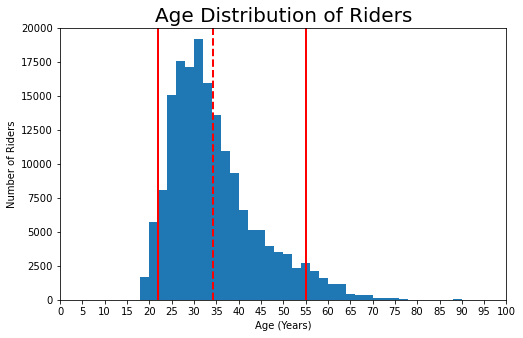

The mean = 34.2 Years Old
The 5th Percentile =  22.0 Years old
The 95th Percentile =  55.0 Years old


In [29]:
# start with a standard-scaled plot
binsize = 2
bins = np.arange(0, filter2['age'].max()+binsize, binsize)

fig0 = plt.figure(figsize=[8, 5])

plt.hist(filter2['age'], bins = bins)
plt.xlim(0, 100)
plt.ylim(0, 20000)
plt.xticks(np.arange(0, 101, step=5))
plt.xlabel('Age (Years)')
plt.ylabel('Number of Riders')
plt.title('Age Distribution of Riders', fontsize=20)

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axvline(filter2.age.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axvline(np.percentile(filter2.age, 95), color='r', linewidth=2)
plt.axvline(np.percentile(filter2.age, 5), color='r', linewidth=2)
plt.show()

# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} Years Old'.format(filter2.age.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
print('The 5th Percentile = ',np.percentile(filter2.age, 5), 'Years old')
print('The 95th Percentile = ',np.percentile(filter2.age, 95), 'Years old')

<font color='blue'>
    
### Let's take a look what day is the most popular -- variable(s): ```start_day_of_week```

In [30]:
count_days = df_oppertunity.groupby('start_day_of_week')['start_day_of_week'].count().sort_values(ascending=False)
count_days

start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_day_of_week, dtype: int64

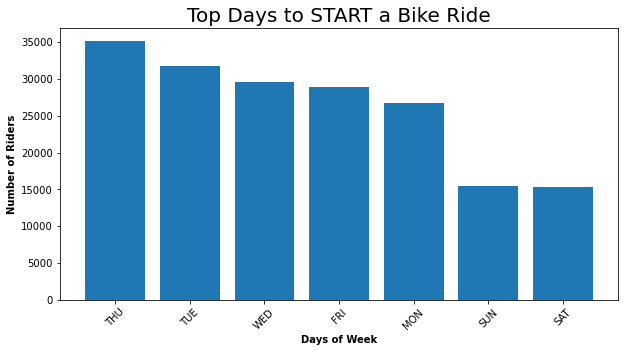

Most popular to least popular days to rent bike
 start_day_of_week
THU    35176
TUE    31781
WED    29609
FRI    28962
MON    26807
SUN    15503
SAT    15377
Name: start_day_of_week, dtype: int64


In [31]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
    
x = list(count_days.keys())
xloc = count_days

fig1 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Top Days to START a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');

plt.show()

print('Most popular to least popular days to rent bike\n',count_days)

<font color='blue'>
    
### Let's take a look at the age of our riders -- variable(s) ```start_hour```

In [32]:
# strip start_hour to just hour portion
df_strip = df_oppertunity
df_strip['hours'] = df_strip['start_hour'].str.slice(stop=2)

count_hours = df_strip.groupby('hours')['hours'].count().sort_values(ascending=False)[:20]
count_hours

hours
17    21847
08    21041
18    16812
09    15886
16    14150
07    10610
19     9873
15     9163
12     8707
13     8531
10     8354
14     8135
11     7872
20     6472
21     4560
06     3484
22     2915
23     1645
00      925
05      896
Name: hours, dtype: int64

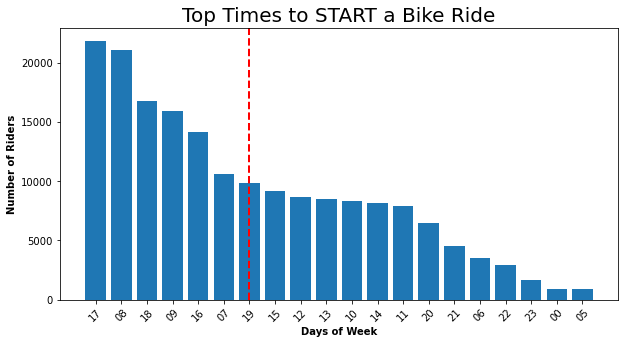

In [33]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
x = list(count_hours.keys())
xloc = count_hours

fig2 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Top Times to START a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');
plt.axvline(x=6, color='r', linestyle='dashed', linewidth=2)

plt.show()

#print('Most popular to least popular START times to rent bike\n',count_hours)

<font color='blue'>
    
Might as well see the end time as well... variable ```end_hour```

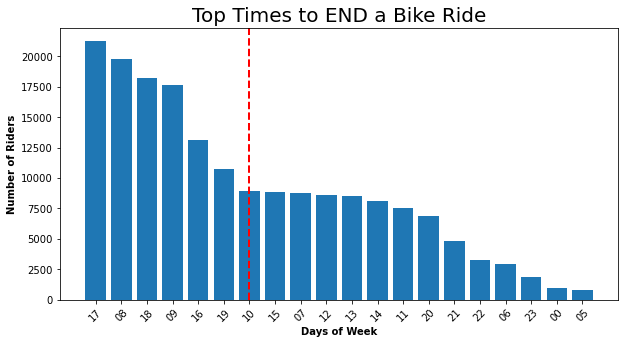

In [34]:
# strip start_hour to just hour portion
df_strip1 = df_oppertunity
df_strip1['hours'] = df_strip1['end_hour'].str.slice(stop=2)

count_hours1 = df_strip1.groupby('hours')['hours'].count().sort_values(ascending=False)[:20]

#plotting
x = list(count_hours1.keys())
xloc = count_hours1

fig3 = plt.figure(figsize = (10,5))

#creating the plot
plt.bar(x, xloc)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('Top Times to END a Bike Ride', fontsize=20);
plt.xlabel('Days of Week', weight='bold');
plt.ylabel('Number of Riders', weight='bold');
plt.axvline(x=6, color='r', linestyle='dashed', linewidth=2)
plt.show()

#print('Most popular to least popular END times to rent bike\n',count_hours1)

<font color='blue'>
    
Review these two plots together

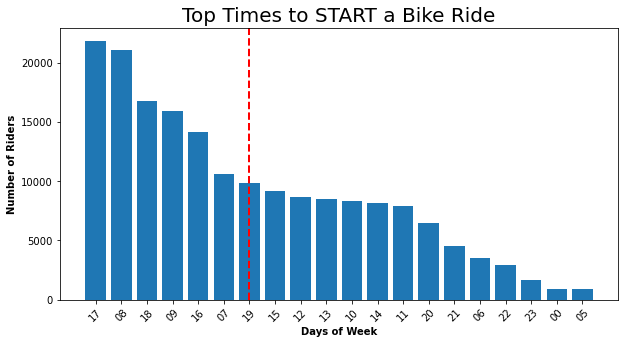

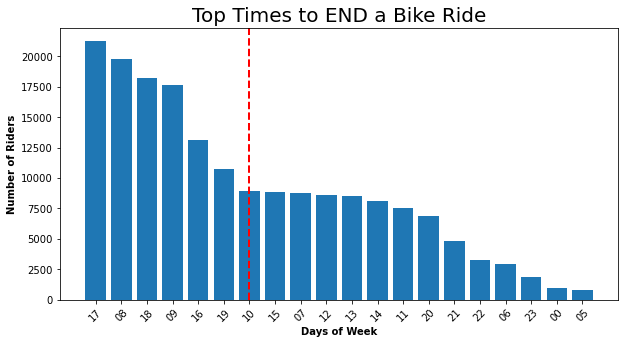

In [35]:
display(fig2)
display(fig3)

In [36]:
print('Distribution START Ride Times (Time 24-Hour Clock)\n', count_hours)
print('\nDistribution START Ride Times (Time 24-Hour Clock)\n', count_hours1)

Distribution START Ride Times (Time 24-Hour Clock)
 hours
17    21847
08    21041
18    16812
09    15886
16    14150
07    10610
19     9873
15     9163
12     8707
13     8531
10     8354
14     8135
11     7872
20     6472
21     4560
06     3484
22     2915
23     1645
00      925
05      896
Name: hours, dtype: int64

Distribution START Ride Times (Time 24-Hour Clock)
 hours
17    21278
08    19767
18    18245
09    17669
16    13159
19    10723
10     8964
15     8825
07     8777
12     8598
13     8507
14     8137
11     7578
20     6913
21     4864
22     3238
06     2966
23     1833
00     1003
05      759
Name: hours, dtype: int64


<font color='blue'>

*Interesting, note that the top 5 times for START and END are the same... riders only using bikes in less than an hour?*
*Confirm duration of ride to verify*

<font color='blue'>
    
### Let's take a look how long people are riding -- variable(s): ```duration_min```

In [37]:
# take a look at stat distribution
df_oppertunity.describe()

,duration_hr,duration_min,member_birth_year,age
count,183215.000000,183215.000000,183215.000000,183215.000000
mean,0.201639,12.098367,1895.288475,32.607909
std,0.498633,29.917978,412.013105,12.067822
min,0.016944,1.016667,0.000000,0.000000
25%,0.090278,5.416667,1979.000000,26.000000
50%,0.142778,8.566667,1987.000000,31.000000
75%,0.221111,13.266667,1992.000000,38.000000
max,23.734444,1424.066667,2001.000000,99.000000


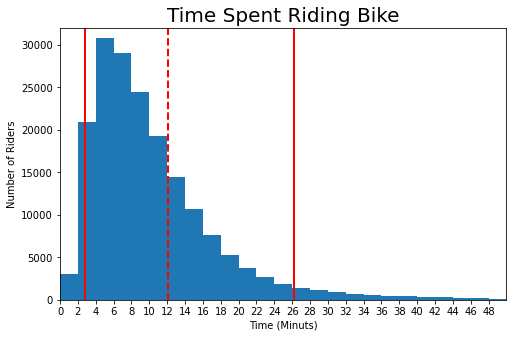

The mean = 12.1 minutes
The 5th Percentile = 2.8 minutes long
The 95th Percentile = 26.2 minutes long


In [38]:
filter2 = df_oppertunity

# start with a standard-scaled plot
binsize = 2
bins = np.arange(0, filter2['duration_min'].max()+binsize, binsize)

fig4 = plt.figure(figsize=[8, 5])

plt.hist(filter2['duration_min'], bins = bins)
plt.xlim(0, 50)
plt.ylim(0, 32000)
plt.xticks(np.arange(0, 50, step=2))
plt.xlabel('Time (Minuts)')
plt.ylabel('Number of Riders')
plt.title('Time Spent Riding Bike', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axvline(filter2.duration_min.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axvline(np.percentile(filter2.duration_min, 95), color='r', linewidth=2)
plt.axvline(np.percentile(filter2.duration_min, 5), color='r', linewidth=2)
plt.show()

# formating help: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# the mean and 95% confidence bounds
print('The mean = {:.1f} minutes'.format(filter2.duration_min.mean()))
# print('The 95th Percentile is {:.1f} and 5th Percentile is {:.1f}'.format((np.percentile(filter2.age, 95)), (np.percentile(filter2.age, 5)))
#the5th = np.percentile(filter2.duration_min, 5)
print('The 5th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 5)))
print('The 95th Percentile = {:.1f} minutes long'.format(np.percentile(filter2.duration_min, 95)))

In [39]:
print('Distribution of Ride Duration - UNFILTERED\n', filter2.duration_min.describe())

Distribution of Ride Duration - UNFILTERED
 count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64


In [40]:
filter_30min = filter2[filter2['duration_min'] < 30]
print('Distribution of Ride Duration - FILTERED\n', filter_30min.duration_min.describe())

Distribution of Ride Duration - FILTERED
 count    176457.000000
mean          9.570218
std           5.631750
min           1.016667
25%           5.316667
50%           8.316667
75%          12.566667
max          29.983333
Name: duration_min, dtype: float64


<a id='bivariate1'></a>
## 5.3 Exploration - Bivariate Exploration
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#bivariate2">[6.3 Discussion - Bivariate Exploration]</a>

<font color='blue'>

Review of the comparisons of the following variables:
1. Gender vs Age
2. Gender vs Duration of ride

These would be interesting to explore so we can exam the type of population of people are renting our bikes regularly. This could help marketing create more targeted ads.

<font color='blue'>
    
### Gender vs Age

In [41]:
# create new df reference for prototyping
filter1 = df_oppertunity

# remove zeros from age data
filter2 = filter1[filter1['age'] > 1]

genderVSage = filter2.groupby('member_gender')['age'].count().sort_values(ascending=False)
genderVSage.head(5)

member_gender
Male      130443
Female     40791
Other       3646
Name: age, dtype: int64

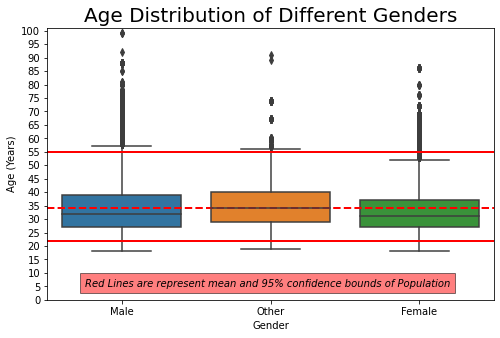

In [42]:
fig5 = plt.figure(figsize = (8, 5))

sns.boxplot(y='age', x='member_gender', data=filter2)

plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Age Distribution of Different Genders', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

yMin = 0
yMax = 101
plt.ylim(yMin, yMax)
plt.yticks(np.arange(yMin, yMax, step=5))

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axhline(filter2.age.mean(), color='r', linestyle='dashed', linewidth=2)

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axhline(np.percentile(filter2.age, 95), color='r', linewidth=2)
plt.axhline(np.percentile(filter2.age, 5), color='r', linewidth=2)

# text location and annotation notes
# help: https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
# https://matplotlib.org/3.1.0/tutorials/text/text_intro.html
plt.text(-0.25, 5, 'Red Lines are represent mean and 95% confidence bounds of Population', 
         style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

plt.show()

<font color='blue'>

### Gender vs Duration

In [43]:
# leverage data frame from 'Gender vs Age'

# remove minutes OVER 30min, based on distrubtion data before
assert filter_30min.duration_min.max() < 31, "There's ride duration data that is NOT under 30 mins!"

genderVSduration = filter_30min.groupby('member_gender')['duration_min'].count().sort_values(ascending=False)
genderVSduration.head(5)

member_gender
Male      126421
Female     39105
0           7529
Other       3402
Name: duration_min, dtype: int64

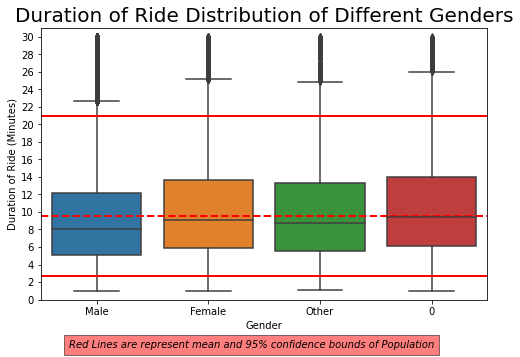

In [44]:
fig6 = plt.figure(figsize = (8, 5))

sns.boxplot(y='duration_min', x='member_gender', data=filter_30min)

plt.xlabel('Gender')
plt.ylabel('Duration of Ride (Minutes)')
plt.title('Duration of Ride Distribution of Different Genders', fontsize=20)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

yMin = 0
yMax = 31
plt.ylim(yMin, yMax)
plt.yticks(np.arange(yMin, yMax, step=2))

# help adding mean line to plot
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axhline(filter_30min.duration_min.mean(), color='r', linestyle='dashed', linewidth=2)

# help: https://matplotlib.org/3.1.0/tutorials/text/text_intro.html
plt.text(-0.25, -5.5, 'Red Lines are represent mean and 95% confidence bounds of Population', 
         style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

# confidence bounds
# help: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
plt.axhline(np.percentile(filter_30min.duration_min, 5), color='r', linewidth=2)
plt.axhline(np.percentile(filter_30min.duration_min, 95), color='r', linewidth=2)

plt.show()

<font color='blue'>
    
Review these two plots together

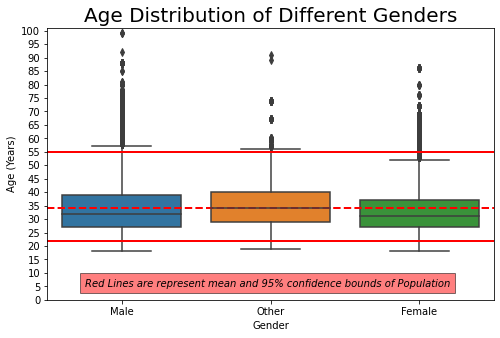

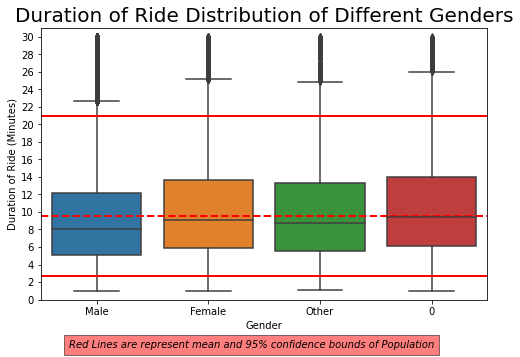

In [45]:
display(fig5)
display(fig6)

In [46]:
print('Distribution of Ride Duration - UNFILTERED\n\n', filter2.duration_min.describe())

print('\n-----Quick Note-----')
print('However, note that the 95 Percentile Ride Duration = {:.1f} minutes.'.format(np.percentile(filter2.duration_min, 95)))
print('Therefore data trimmed to 30 mins because it more sensible/practical statistics')
print('     i.e., "data will makes more sense"')
print('--------------------')
print('\nDistribution of Ride Duration - FILTERED\n\n', filter_30min.duration_min.describe())

Distribution of Ride Duration - UNFILTERED

 count    174880.000000
mean         11.733706
std          27.375248
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

-----Quick Note-----
However, note that the 95 Percentile Ride Duration = 25.5 minutes.
Therefore data trimmed to 30 mins because it more sensible/practical statistics
     i.e., "data will makes more sense"
--------------------

Distribution of Ride Duration - FILTERED

 count    176457.000000
mean          9.570218
std           5.631750
min           1.016667
25%           5.316667
50%           8.316667
75%          12.566667
max          29.983333
Name: duration_min, dtype: float64


<a id='multivariate1'></a>
## 5.4 Exploration - Multivariate Exploration
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#multivariate2">[6.4 Discussion - Multivariate Exploration]</a> 

<hr size="5"/>
<h5><center>📊 Data Exploration END ➜ Discussion START 📊</center></h5>        
<hr size="5"/>

<a id='discussion'></a>
# 6. DISCUSSION

<font color=blue>
    
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#preliminary1">[Preliminary Review]</a>
--- <a href="#univariate1">[Univariate Exploration]</a>
--- <a href="#bivariate1">[Bivariate Exploration]</a>
--- <a href="#multivariate1">[Multivariate Exploration]</a> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#preliminary2">[Preliminary Review]</a>
--- <a href="#univariate2">[Univariate Exploration]</a>
--- <a href="#bivariate2">[Bivariate Exploration]</a>
--- <a href="#multivariate2">[Multivariate Exploration]</a> 

<a id='preliminary2'></a>
## 6.1 Discussion - Preliminary Wrangling
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#preliminary1">[5.1 Exploration - Preliminary Review]</a>

<a href="#discussion">[#6 Discussion]</a><br>
    
### What is the structure of your dataset?

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) <br>
cut: Fair, Good, Very Good, Premium, Ideal <br>
color: J, I, H, G, F, E, D <br>
clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

<a id='univariate2'></a>
##  6.2 Discussion - Univariate Exploration

<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#univariate1">[5.2 Exploration - Univariate Exploration]</a>

<a href="#discussion">[#6 Discussion]</a><br>

I'll start by looking at the distribution of the main variable of interest: price.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between \$500 and \$1000, and another just below \$5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

<a id='bivariate2'></a>
## 6.3 Discussion - Bivariate Exploration

<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#bivariate1">[5.3 Exploration - Bivariate Exploration]</a>

<a href="#discussion">[#6 Discussion]</a><br>

To start off with, I want to look at the pairwise correlations present between features in the data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between the 'x', 'y', and 'z' measurements of diamonds to the other linear dimensions as well as to the 'carat' variable. A small negative correlation was observed between table size and depth, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also a small interaction in the categorical quality features. Diamonds of lower clarity appear to have slightly better cut and color grades.

<a id='multivariate2'></a>
## 6.4 Discussion - Multivariate Exploration

<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#multivariate1">[5.4 Exploration - Multivariate Exploration]</a> 

<a href="#discussion">[#6 Discussion]</a><br>

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that higher grades were more prevalent in smaller diamonds, which fetch lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three categorical features. However, the features also aren't fully independent. But it is interesting in something like the 1-carat plot for prices against cut and clarity, the shape of the 'cut' dots is fairly similar for the SI2 through VVS2 clarity levels.

<hr size="5"/>
<h5><center>🍻 Discussion END ➜ Conclusion START 🍻</center></h5>        
<hr size="5"/>

<a id='conclusion'></a>
# 7. CONCLUSION


<font color=blue>
    
<a href="#contents">[Table of Contents]</a>

<a href="#explore">[#5 Data Exporation]</a><br>
--- <a href="#preliminary1">[Preliminary Review]</a>
--- <a href="#univariate1">[Univariate Exploration]</a>
--- <a href="#bivariate1">[Bivariate Exploration]</a>
--- <a href="#multivariate1">[Multivariate Exploration]</a> 

<a href="#discussion">[#6 Discussion]</a><br>
--- <a href="#preliminary2">[Preliminary Review]</a>
--- <a href="#univariate2">[Univariate Exploration]</a>
--- <a href="#bivariate2">[Bivariate Exploration]</a>
--- <a href="#multivariate2">[Multivariate Exploration]</a> 

<hr size="5"/>
<h5><center>🏁 Conclusion END -- Project FINALE 🏁</center></h5>        
<hr size="5"/>

# End of Data Project!

Made with ❤️ by Jhon!

Further impovements include...
1. Validation statements using ```assert``` clauses to confirm that data manipuation is correct during cleaning stage
2. More plots exploring data
3. Adding helpful annotations to plots

<a href="#contents">[Table of Contents]</a>